In [2]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


In [3]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 


#Read the Mouse and Drug Data and the Clinical Trial Data
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 
print(Vax_Data.iloc[:,1].unique())
file = 'Population_Data.csv'
pop_read = pd.read_csv(file)
pop_read
pop_years = pop_read.drop(['2018'], axis = 1)
pop_years_fin = pop_years.set_index("County")
pop_years_fin

['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'California' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Sierra' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Ventura' 'Yolo' 'Yuba']


,2009,2010,2011,2012,2013,2014,2015,2016,2017
County,,,,,,,,,
Alameda County,1491482,1513043,1530998,1554138,1580247,1608674,1634634,1650306,1658131
El Dorado County,178447,181133,180918,180578,181497,183161,184660,186082,188722
Kern County,807407,841072,848140,853963,862557,869957,877197,882361,888988
Los Angeles County,9848011,9822433,9876727,9938436,9998105,10048408,10097037,10120540,10118759
Merced County,245321,256732,259333,260971,262198,264649,266651,267971,271340
Napa County,134650,136808,137750,138625,139706,140567,141096,141185,140386
Orange County,3026786,3016559,3050867,3080419,3108009,3130322,3153962,3170707,3179950
Sacramento County,1400949,1421414,1433739,1445078,1457750,1475618,1494294,1511510,1527718
San Diego County,3053793,3103306,3137372,3175201,3211248,3250993,3284061,3310280,3325468


In [4]:

#dd_complete_15_pivot = dd_complete_15.pivot_table(index = "year", columns = "Drug")
Vax_Data.head()

,disease,county,year,count
0,Diphtheria,Alameda,2001,0
1,Diphtheria,Alameda,2002,0
2,Diphtheria,Alameda,2003,0
3,Diphtheria,Alameda,2004,0
4,Diphtheria,Alameda,2005,0


In [22]:
#dd_drop = Vax_Data.groupby("disease").first()
#dd_drop.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_counties = dd_drop.set_index("county")

dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])
dd_complete_15 = dd_complete_15.reset_index()

#dd_complete_4
#dd_complete_15.head()
#disease_county = dd_complete_4.set_index("county")
#disease_county


In [6]:

#dd_county_year = dd_complete_4.stack()
#dd_county_year = pd.DataFrame(dd_county_year)
#dd_county_year



In [62]:

dd_years_09 = dd_complete_15[dd_complete_15["year"]== 2009]
dd_years_10 = dd_complete_15[dd_complete_15["year"]== 2010]
dd_years_11 = dd_complete_15[dd_complete_15["year"]== 2011]
dd_years_12 = dd_complete_15[dd_complete_15["year"]== 2012]
dd_years_13 = dd_complete_15[dd_complete_15["year"]== 2003]
dd_years_14 = dd_complete_15[dd_complete_15["year"]== 2014]
dd_years_15 = dd_complete_15[dd_complete_15["year"]== 2015]
dd_years_16 = dd_complete_15[dd_complete_15["year"]== 2016]
dd_years_17 = dd_complete_15[dd_complete_15["year"]== 2017]


#2009 and 2013 only have 45 data points per column, all the other years have 60 
dd_measles_09 = dd_years_09[dd_years_09["disease"]== "Measles"]
dd_measles_10 = dd_years_10[dd_years_10["disease"]== "Measles"]
dd_measles_11 = dd_years_11[dd_years_11["disease"]== "Measles"]
dd_measles_09


,county,disease,year,count
8,Alameda,Measles,2009,0
25,El Dorado,Measles,2009,0
42,Kern,Measles,2009,0
59,Los Angeles,Measles,2009,1
76,Merced,Measles,2009,0
93,Napa,Measles,2009,3
110,Orange,Measles,2009,0
127,Sacramento,Measles,2009,0
144,San Diego,Measles,2009,1
161,San Mateo,Measles,2009,0


In [10]:
#d_yr = disease_county.loc["Alameda"]
#d_yr_09 = d_yr["year"]>2008


#d_yr_09_alameda

In [24]:
#mung data to fit counts of disease per year (2009-2017) by county

dyr = dd_complete_4.set_index('year')
dyrs = dyr.drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_meas = ddyr_alameda[ddyr_alameda["disease"]== "Measles"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_meas = ddyr_la[ddyr_la["disease"]== "Measles"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_meas = ddyr_yuba[ddyr_yuba["disease"]== "Measles"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_meas = ddyr_sonoma[ddyr_sonoma["disease"]== "Measles"]

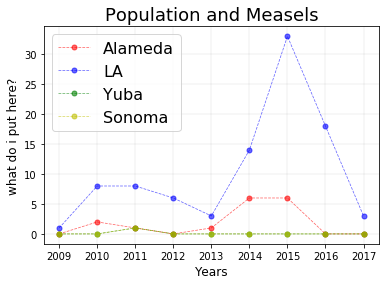

In [61]:
x_axis = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

plt.title('Population and Measels', fontsize = 18)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('what do i put here?', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#measles by 4 counties and years
plt.plot(x_axis, ddyr_alameda_meas.iloc[:,2], marker = 'o', markersize=5, linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_meas.iloc[:,2], marker = 'o', markersize=5, linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_meas.iloc[:,2], marker = 'o', markersize=5, linestyle="--", linewidth=0.75, color = 'g', alpha = 0.6, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_meas.iloc[:,2], marker = 'o', markersize=5, linestyle="--", linewidth=0.75, color = 'y', alpha = 0.6, label = "Sonoma",)



plt.legend(fontsize = 16)

